<a href="https://colab.research.google.com/github/JenishaTailor/Machine-Learning-Example/blob/main/Demo_Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Demo - Cleaning Data</h2>

In this demo, you will be shown how to inspect and remove various inconsistencies from data in order to prepare it for analysis.

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np


In [ ]:
# Read sample of diabetes data from a CSV file

df = pd.read_csv('/content/diabetes_sample.csv')
df

In [ ]:
# Check if there are any null values in the data

#print(df.isnull().sum())

# Check for null values in column Insulin
print(df.Insulin.isnull())

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: Insulin, dtype: bool


In [ ]:
# Fill the rows containing null values in Insulin column with the mean value of that column

df.Insulin = df.Insulin.fillna(df.Insulin.mean())
df
#df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

# Observe that the null value is filled using the mean

,PatientID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,PT1001,6,148,72,35,250.000000,33.6,0.627,50,1
1,PT1002,1,85,66,29,300.000000,26.6,0.351,31,0
2,PT1003,8,183,64,0,216.571429,23.3,0.672,32,1
3,PT1004,1,89,66,23,94.000000,28.1,0.167,21,0
4,PT1005,0,137,40,35,168.000000,43.1,2.288,33,1
5,PT1005,0,137,40,35,168.000000,43.1,2.288,33,1
6,PT1006,3,78,50,32,88.000000,31.0,0.248,26,1
7,PT1007,10,115,0,0,400.000000,35.3,0.134,29,0
8,PT1008,2,197,70,45,543.000000,30.5,0.158,53,1
9,PT1009,8,125,96,0,0.000000,0.0,0.232,54,1


In [ ]:
# Check for duplicate rows

df.duplicated()

# Here, only row 5 is displayed since row 4 & 5 are exact copies of each other


0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool

In [ ]:
# Check if any patient has a duplicate entry using PatientID column

df.duplicated(['PatientID'])

# Observe that one more entry is returned as True in this case

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
dtype: bool

##### Conclusion: This code demonstrates how to remove inconsistancies from a given dataset using various functions from pandas

Demo - Detecting and Removing Outliers
In this demo, you will be shown how to detect and remove outliers using Boxplot, Z-score and IQR score.

<Axes: ylabel='BMI'>

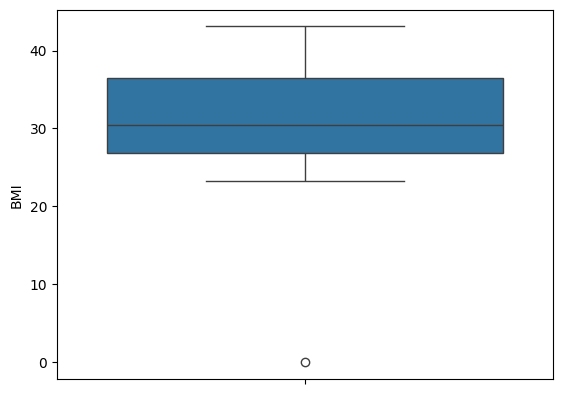

In [9]:
import seaborn as sns
sns.boxplot(df['BMI'])

<Axes: ylabel='BMI'>

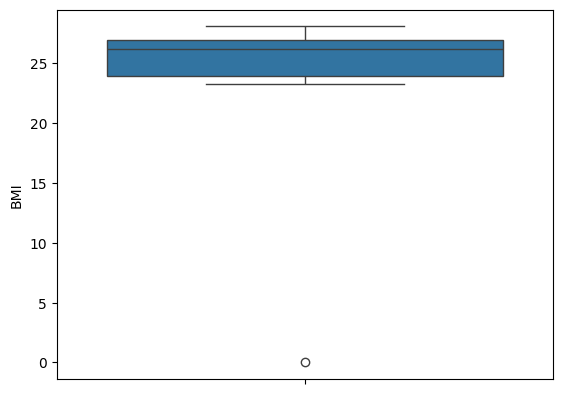

In [11]:
threshold = 30
removed_outliers = df[df["BMI"] <= threshold]
sns.boxplot(removed_outliers["BMI"])


Z-Score

In [13]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Age']))
print(z)

0     0.847152
1     0.690672
2     0.609734
3     1.500053
4     0.528796
5     0.528796
6     1.095363
7     0.852548
8     1.089967
9     1.170905
10    0.771610
11    0.447858
12    1.413719
13    1.575596
14    0.928091
Name: Age, dtype: float64


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [16]:
import numpy as np

threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (15, 10)
DataFrame Shape after Removing Outliers: (15, 10)


Using IQR Score

In [22]:
# STep 1 : Calculate IQR
import numpy as np
df_iqr = df["BMI"]
Q1 = df_iqr.quantile(0.25)
Q3 = df_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

9.600000000000001


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

 upper = Q3 +1.5*IQR


 lower = Q1 – 1.5*IQR

In [24]:
upper = Q3+1.5*IQR
upper_array = np.array(df_iqr>= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df_iqr<= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 50.85000000000001
0
Lower Bound: 12.45
1


In [28]:
#Remove the outlier
upper_array = np.where(df_iqr >= upper)[0]
lower_array = np.where(df_iqr <= lower)[0]
df_iqr.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_iqr.shape)

New Shape:  (14,)
